# *E. coli* iJO1366 Model Attributes

Set the environment

In [1]:
import cobra.test
import pandas as pd
import numpy as np
import pandas as pd
import escher
from escher import Builder
from cobra.sampling import sample
import matplotlib.pyplot as plt
from cobrapy_bigg_client import client
from cobra.flux_analysis import production_envelope

pd.set_option('display.max_rows', 1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)

Load the *E.coli* core model "iJO1366.json"

In [2]:
model_orig = client.download_model('iJO1366', save=False) # Loading the model to the simulation
model = model_orig.copy()

Academic license - for non-commercial use only - expires 2022-12-07
Using license file C:\Users\scott\gurobi.lic
Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmpbd_0wdbi.lp
Reading time = 0.07 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


## 1. Model Attribute Summary

In [3]:
model

Name,iJO1366
Memory address,0x01e09681edf0
Number of metabolites,1805
Number of reactions,2583
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


## 2. Biomass Functions

Find the biomass functions available in the model

In [4]:
for reaction in model.reactions.query('biomass', 'name'):
    print(reaction.name)

E. coli biomass objective function (iJO1366) - WT - with 53.95 GAM estimate
E. coli biomass objective function (iJO1366) - core - with 53.95 GAM estimate


Note that there are two biomass functions that can be used with this model: core and wild type (WT).

Properties of the core biomass function

In [5]:
model.reactions.BIOMASS_Ec_iJO1366_core_53p95M

Reaction identifier,BIOMASS_Ec_iJO1366_core_53p95M
Name,E. coli biomass objective function (iJO1366) - core - with 53.95 GAM estimate
Memory address,0x01e0be479610
Stoichiometry,0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c +... 0.000223 10-Formyltetrahydrofolate + 2.6e-05 [2Fe-2S] iron-sulfur cluster + 0.000223 2-Octaprenyl-6-hydroxyphenol + 0.00026 [4Fe-4S] iron-sulfur cluster + 0.513689 L-Alanine + 0.000223 S-Adenosyl-...
GPR,
Lower bound,0.0
Upper bound,1000.0


Properties of the wild type biomass function

In [6]:
model.reactions.BIOMASS_Ec_iJO1366_WT_53p95M

Reaction identifier,BIOMASS_Ec_iJO1366_WT_53p95M
Name,E. coli biomass objective function (iJO1366) - WT - with 53.95 GAM estimate
Memory address,0x01e0be479520
Stoichiometry,0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c +... 0.000223 10-Formyltetrahydrofolate + 0.000223 2-Demethylmenaquinol 8 + 2.5e-05 [2Fe-2S] iron-sulfur cluster + 0.000248 [4Fe-4S] iron-sulfur cluster + 0.000223 5-Methyltetrahydrofolate + 0.000279...
GPR,
Lower bound,0.0
Upper bound,1000.0


These biomass functions will be discussed more in "iJO1366_Biomass_Functions.ipynb"

## 3. Default Objective Function

Identify the default objective function

In [7]:
print('Objective expression: ', model.objective.expression)
print('Objective direction (max/min): ',model.objective.direction)

Objective expression:  1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Objective direction (max/min):  max


Note that the objective function ia optimizing biomass growth!

## 4. Compartments

In [8]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

## 5. Subsystems

In [9]:
model = client.download_model('iJO1366', save=False) # Loading the model to the simulation
reaction_subsystem = [r.subsystem for r in model.reactions]
subsystem = pd.DataFrame(reaction_subsystem, columns = ['iJO1366 Subsystems'])
subsystem = subsystem.drop_duplicates()
subsystem = subsystem.reset_index(drop=True)
subsystem

,iJO1366 Subsystems
0,Extracellular exchange
1,Intracellular demand
2,Biomass and maintenance functions
3,"Transport, Inner Membrane"
4,"Transport, Outer Membrane Porin"
5,"Transport, Outer Membrane"
6,Nucleotide Salvage Pathway
7,Glycerophospholipid Metabolism
8,Alternate Carbon Metabolism
9,Cofactor and Prosthetic Group Biosynthesis


## 6. Reactions

In [10]:
reaction_names = [r.name for r in model.reactions]
reaction_ids = [r.id for r in model.reactions]
reaction_formula = [r.reaction for r in model.reactions]
reaction_LB = [r.lower_bound for r in model.reactions]
reaction_UB = [r.upper_bound for r in model.reactions]
reaction_subsystem = [r.subsystem for r in model.reactions]
reactionList = {'Reaction ID': reaction_ids,
                'Reaction Name': reaction_names,
                'Reaction Formula': reaction_formula,
                'Reaction Lower Bound': reaction_LB,
                'Reaction Upper Bound': reaction_UB,
                'Reaction Subsystem': reaction_subsystem,
               }

df = pd.DataFrame(reactionList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                          'Reaction Lower Bound','Reaction Upper Bound','Reaction Subsystem'])
df[0:100]

,Reaction ID,Reaction Name,Reaction Formula,Reaction Lower Bound,Reaction Upper Bound,Reaction Subsystem
0,EX_cm_e,Chloramphenicol exchange,cm_e -->,0.0,1000.0,Extracellular exchange
1,EX_cmp_e,CMP exchange,cmp_e -->,0.0,1000.0,Extracellular exchange
2,EX_co2_e,CO2 exchange,co2_e <=>,-1000.0,1000.0,Extracellular exchange
3,EX_cobalt2_e,Co2+ exchange,cobalt2_e <=>,-1000.0,1000.0,Extracellular exchange
4,DM_4crsol_c,Sink needed to allow p-Cresol to leave system,4crsol_c -->,0.0,1000.0,Intracellular demand
5,DM_5drib_c,Sink needed to allow 5'-deoxyribose to leave system,5drib_c -->,0.0,1000.0,Intracellular demand
6,DM_aacald_c,Sink needed to allow aminoacetaldehyde to leave system,aacald_c -->,0.0,1000.0,Intracellular demand
7,DM_amob_c,Sink needed to allow S-Adenosyl-4-methylthio-2-oxobutanoate to leave system,amob_c -->,0.0,1000.0,Intracellular demand
8,DM_mththf_c,"Sink needed to allow (2R,4S)-2-methyl-2,3,3,4-tetrahydroxytetrahydrofuran to leave system",mththf_c -->,0.0,1000.0,Intracellular demand
9,EX_colipa_e,Core oligosaccharide lipid A exchange,colipa_e -->,0.0,1000.0,Extracellular exchange


## 7. Boundary Reactions
Looking at the boundary reactions. First, the **exchange reactions**.

In [11]:
exchange_ids = [r.id for r in model.exchanges]
exchange_ids

['EX_cm_e',
 'EX_cmp_e',
 'EX_co2_e',
 'EX_cobalt2_e',
 'EX_colipa_e',
 'EX_glc__D_e',
 'EX_glcn_e',
 'EX_glcr_e',
 'EX_colipap_e',
 'EX_glcur_e',
 'EX_glcur1p_e',
 'EX_12ppd__R_e',
 'EX_gln__L_e',
 'EX_cpgn_e',
 'EX_glu__L_e',
 'EX_gly_e',
 'EX_glyald_e',
 'EX_glyb_e',
 'EX_glyc_e',
 'EX_12ppd__S_e',
 'EX_14glucan_e',
 'EX_cpgn_un_e',
 'EX_15dap_e',
 'EX_glyc__R_e',
 'EX_glyc2p_e',
 'EX_23camp_e',
 'EX_23ccmp_e',
 'EX_23cgmp_e',
 'EX_23cump_e',
 'EX_23dappa_e',
 'EX_26dap__M_e',
 'EX_glyc3p_e',
 'EX_glyclt_e',
 'EX_gmp_e',
 'EX_gsn_e',
 'EX_gthox_e',
 'EX_gthrd_e',
 'EX_gtp_e',
 'EX_gua_e',
 'EX_h_e',
 'EX_h2_e',
 'EX_h2o_e',
 'EX_h2o2_e',
 'EX_h2s_e',
 'EX_hacolipa_e',
 'EX_halipa_e',
 'EX_hdca_e',
 'EX_hdcea_e',
 'EX_hg2_e',
 'EX_his__L_e',
 'EX_2ddglcn_e',
 'EX_34dhpac_e',
 'EX_3amp_e',
 'EX_3cmp_e',
 'EX_3gmp_e',
 'EX_3hcinnm_e',
 'EX_3hpp_e',
 'EX_3hpppn_e',
 'EX_hom__L_e',
 'EX_hxa_e',
 'EX_hxan_e',
 'EX_idon__L_e',
 'EX_3ump_e',
 'EX_4abut_e',
 'EX_4hoxpacd_e',
 'EX_5dglcn_e',


A table showing the properties of the exchange reactions.

In [12]:
exchange_ids = [r.id for r in model.exchanges]
exchange_names = [r.name for r in model.exchanges]
exchange_formula = [r.reaction for r in model.exchanges]
exchange_lb = [r.lower_bound for r in model.exchanges]
exchange_ub = [r.upper_bound for r in model.exchanges]
exchangeList = {'Reaction ID': exchange_ids,
                'Reaction Name': exchange_names,
                'Reaction Formula': exchange_formula,
                'Reaction Lower Bound': exchange_lb,
                'Reaction Upper Bound': exchange_ub,
               }
exchange_df = pd.DataFrame(exchangeList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                                   'Reaction Lower Bound','Reaction Upper Bound'])
exchange_df

,Reaction ID,Reaction Name,Reaction Formula,Reaction Lower Bound,Reaction Upper Bound
0,EX_cm_e,Chloramphenicol exchange,cm_e -->,0.00,1000.0
1,EX_cmp_e,CMP exchange,cmp_e -->,0.00,1000.0
2,EX_co2_e,CO2 exchange,co2_e <=>,-1000.00,1000.0
3,EX_cobalt2_e,Co2+ exchange,cobalt2_e <=>,-1000.00,1000.0
4,EX_colipa_e,Core oligosaccharide lipid A exchange,colipa_e -->,0.00,1000.0
5,EX_glc__D_e,D-Glucose exchange,glc__D_e <=>,-10.00,1000.0
6,EX_glcn_e,D-Gluconate exchange,glcn_e -->,0.00,1000.0
7,EX_glcr_e,D-Glucarate exchange,glcr_e -->,0.00,1000.0
8,EX_colipap_e,Core oligosaccharide lipid A diphosphate exchange,colipap_e -->,0.00,1000.0
9,EX_glcur_e,D-Glucuronate exchange,glcur_e -->,0.00,1000.0


Second, the **demand reactions**

In [13]:
demands_ids = [r.id for r in model.demands]
demands_ids

['DM_4crsol_c',
 'DM_5drib_c',
 'DM_aacald_c',
 'DM_amob_c',
 'DM_mththf_c',
 'DM_oxam_c']

A table of the demand reactions can be made by

In [14]:
demand_ids = [r.id for r in model.demands]
demand_names = [r.name for r in model.demands]
demand_formula = [r.reaction for r in model.demands]
demand_lb = [r.lower_bound for r in model.demands]
demand_ub = [r.upper_bound for r in model.demands]
demandList = {'Reaction ID': demand_ids,
              'Reaction Name': demand_names,
              'Reaction Formula': demand_formula,
              'Reaction Lower Bound': demand_lb,
              'Reaction Upper Bound': demand_ub,
               }
demand_df = pd.DataFrame(demandList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                                   'Reaction Lower Bound','Reaction Upper Bound'])
demand_df

,Reaction ID,Reaction Name,Reaction Formula,Reaction Lower Bound,Reaction Upper Bound
0,DM_4crsol_c,Sink needed to allow p-Cresol to leave system,4crsol_c -->,0.0,1000.0
1,DM_5drib_c,Sink needed to allow 5'-deoxyribose to leave system,5drib_c -->,0.0,1000.0
2,DM_aacald_c,Sink needed to allow aminoacetaldehyde to leave system,aacald_c -->,0.0,1000.0
3,DM_amob_c,Sink needed to allow S-Adenosyl-4-methylthio-2-oxobutanoate to leave system,amob_c -->,0.0,1000.0
4,DM_mththf_c,"Sink needed to allow (2R,4S)-2-methyl-2,3,3,4-tetrahydroxytetrahydrofuran to leave system",mththf_c -->,0.0,1000.0
5,DM_oxam_c,Sink needed to allow oxamate to leave system,oxam_c -->,0.0,1000.0


Third, the **sink reactions**.

In [15]:
model.sinks
sinks_ids = [r.id for r in model.sinks]
sinks_ids

[]

A table for the sink reactions

In [16]:
sink_ids = [r.id for r in model.sinks]
sink_names = [r.name for r in model.sinks]
sink_formula = [r.reaction for r in model.sinks]
sink_lb = [r.lower_bound for r in model.sinks]
sink_ub = [r.upper_bound for r in model.sinks]
sinkList = {'Reaction ID': sink_ids,
            'Reaction Name': sink_names,
            'Reaction Formula': sink_formula,
            'Reaction Lower Bound': sink_lb,
            'Reaction Upper Bound': sink_ub,
           }
sink_df = pd.DataFrame(sinkList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                             'Reaction Lower Bound','Reaction Upper Bound' ])
sink_df

,Reaction ID,Reaction Name,Reaction Formula,Reaction Lower Bound,Reaction Upper Bound


## 8. Metabolites

In [17]:
metabolite_names = [m.name for m in model.metabolites]
metabolite_ids = [m.id for m in model.metabolites]
metabolite_compartment = [m.compartment for m in model.metabolites]
metabolite_formula = [m.formula for m in model.metabolites]
metabolite_charge = [m.charge for m in model.metabolites]
metaboliteList = {'Metabolite ID': metabolite_ids,
                  'Metabolite Name': metabolite_names,
                  'Metabolite Formula': metabolite_formula,
                  'Metabolite Compartment': metabolite_compartment,
                  'Metabolite Charge': metabolite_charge
                 }

df = pd.DataFrame(metaboliteList, columns= ['Metabolite ID','Metabolite Name', 'Metabolite Formula', 'Metabolite Compartment','Metabolite Charge'])
df[0:100]

,Metabolite ID,Metabolite Name,Metabolite Formula,Metabolite Compartment,Metabolite Charge
0,10fthf_c,10-Formyltetrahydrofolate,C20H21N7O7,c,-2
1,12dgr120_c,"1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0)",C27H52O5,c,0
2,12dgr140_c,"1,2-Diacyl-sn-glycerol (ditetradecanoyl, n-C14:0)",C31H60O5,c,0
3,12dgr141_c,"1,2-Diacyl-sn-glycerol (ditetradec-7-enoyl, n-C14:1)",C31H56O5,c,0
4,12dgr160_c,"1,2-Diacyl-sn-glycerol (dihexadecanoyl, n-C16:0)",C35H68O5,c,0
5,12dgr161_c,"1,2-Diacyl-sn-glycerol (dihexadec-9-enoyl, n-C16:1)",C35H64O5,c,0
6,12dgr180_c,"1,2-Diacyl-sn-glycerol (dioctadecanoyl, n-C18:0)",C39H76O5,c,0
7,12dgr181_c,"1,2-Diacyl-sn-glycerol (dioctadec-11-enoyl, n-C18:1)",C39H72O5,c,0
8,12ppd__R_c,"(R)-Propane-1,2-diol",C3H8O2,c,0
9,12ppd__S_c,"(S)-Propane-1,2-diol",C3H8O2,c,0


## 9. Genes

In [18]:
gene_names = [m.name for m in model.genes]
gene_ids = [m.id for m in model.genes]
gene_functional = [m.functional for m in model.genes]
gene_reactions = [m.reactions for m in model.genes]
geneList = {'Gene ID': gene_ids,
            'Gene Name': gene_names,
            'Gene Functional': gene_functional,
            'Gene Reactions': gene_reactions
            }

df = pd.DataFrame(geneList, columns= ['Gene ID','Gene Name', 'Gene Functional', 'Gene Reactions'])
df[0:100]

,Gene ID,Gene Name,Gene Functional,Gene Reactions
0,b1377,ompN,True,"(CSNtex: csn_e <=> csn_p, 34dhpactex: 34dhpac_e <=> 34dhpac_p, MG2tex: mg2_e <=> mg2_p, DALAtex: ala__D_e <=> ala__D_p, UREAtex: urea_e <=> urea_p, XYLtex: xyl__D_e <=> xyl__D_p, PSERtex: pser__L_e <=> pser__L_p, 3PEPTtex: LalaDgluMdap_e <=> LalaDgluMdap_p, HXAtex: hxa_e <=> hxa_p, FE3tex: fe3_e <=> fe3_p, MALDtex: mal__D_e <=> mal__D_p, FUCtex: fuc__L_e <=> fuc__L_p, GAMtex: gam_e <=> gam_p, H2tex: h2_e <=> h2_p, DAMPtex: damp_e <=> damp_p, ACALDtex: acald_e <=> acald_p, 3UMPtex: 3ump_e <=> 3ump_p, GLCURtex: glcur_e <=> glcur_p, NO2tex: no2_e <=> no2_p, OROTtex: orot_e <=> orot_p, SKMtex: skm_e <=> skm_p, NAtex: na1_e <=> na1_p, URAtex: ura_e <=> ura_p, XYLUtex: xylu__L_e <=> xylu__L_p, GTHOXtex: gthox_e <=> gthox_p, FUMtex: fum_e <=> fum_p, SLNTtex: slnt_e <=> slnt_p, SO2tex: so2_e <=> so2_p, PHEtex: phe__L_e <=> phe__L_p, XANtex: xan_e <=> xan_p, ILEtex: ile__L_e <=> ile__L_p, PYDXtex: pydx_e <=> pydx_p, 3CMPtex: 3cmp_e <=> 3cmp_p, 3AMPtex: 3amp_e <=> 3amp_p, TUNGStex: tungs_e <=> tungs_p, PNTOtex: pnto__R_e <=> pnto__R_p, GALURtex: galur_e <=> galur_p, GLYCAtex: glyc__R_e <=> glyc__R_p, GAL1Ptex: gal1p_e <=> gal1p_p, INDOLEtex: indole_e <=> indole_p, NH4tex: nh4_e <=> nh4_p, SERtex: ser__L_e <=> ser__L_p, 4HOXPACDtex: 4hoxpacd_e <=> 4hoxpacd_p, IMPtex: imp_e <=> imp_p, D_LACtex: lac__D_e <=> lac__D_p, GALBDtex: gal_bD_e <=> gal_bD_p, GLCNtex: glcn_e <=> glcn_p, GLCtex_copy1: glc__D_e <=> glc__D_p, GALtex: gal_e <=> gal_p, 3GMPtex: 3gmp_e <=> 3gmp_p, UDPGtex: udpg_e <=> udpg_p, GTPtex: gtp_e <=> gtp_p, ACGALtex: acgal_e <=> acgal_p, UACGAMtex: uacgam_e <=> uacgam_p, HCINNMtex: 3hcinnm_e <=> 3hcinnm_p, 26DAHtex: 26dap__M_e <=> 26dap__M_p, GAMAN6Ptex: gam6p_e <=> gam6p_p, H2O2tex: h2o2_e <=> h2o2_p, DDGLCNtex: 2ddglcn_e <=> 2ddglcn_p, CRNDtex: crn__D_e <=> crn__D_p, CYStex: cys__L_e <=> cys__L_p, ACGAL1Ptex: acgal1p_e <=> acgal1p_p, PItex: pi_e <=> pi_p, 5MTRtex: 5mtr_e <=> 5mtr_p, ORNtex: orn_e <=> orn_p, ASPtex: asp__L_e <=> asp__L_p, O2Stex: o2s_e <=> o2s_p, 23CAMPtex: 23camp_e <=> 23camp_p, CYSDtex: cys__D_e <=> cys__D_p, MOBDtex: mobd_e <=> mobd_p, METSOX1tex: metsox_S__L_e <=> metsox_S__L_p, DCAtex: dca_e <=> dca_p, SO3tex: so3_e <=> so3_p, TAURtex: taur_e <=> taur_p, O2tex: o2_e <=> o2_p, ACMUMtex: acmum_e --> acmum_p, PYDXNtex: pydxn_e <=> pydxn_p, DGSNtex: dgsn_e <=> dgsn_p, MNtex: mn2_e <=> mn2_p, 23CCMPtex: 23ccmp_e <=> 23ccmp_p, F6Ptex: f6p_e <=> f6p_p, LEUtex: leu__L_e <=> leu__L_p, SO4tex: so4_e <=> so4_p, CYANtex: cyan_e <=> cyan_p, G3PCtex: g3pc_e <=> g3pc_p, ARGtex: arg__L_e <=> arg__L_p, MNLtex: mnl_e <=> mnl_p, ETHAtex: etha_e <=> etha_p, G3PGtex: g3pg_e <=> g3pg_p, PPPNtex: pppn_e <=> pppn_p, HYXNtex: hxan_e <=> hxan_p, METSOX2tex: metsox_R__L_e <=> metsox_R__L_p, TCYNTtex: tcynt_e <=> tcynt_p, UMPtex: ump_e <=> ump_p, HG2tex: hg2_e <=> hg2_p, PYDAMtex: pydam_e <=> pydam_p, GBBTNtex: gbbtn_e <=> gbbtn_p, LYStex: lys__L_e <=> lys__L_p, 23CGMPtex: 23cgmp_e <=> 23cgmp_p, MANtex: man_e <=> man_p, ...)"
1,b0241,phoE,True,"(CSNtex: csn_e <=> csn_p, 34dhpactex: 34dhpac_e <=> 34dhpac_p, MG2tex: mg2_e <=> mg2_p, DALAtex: ala__D_e <=> ala__D_p, UREAtex: urea_e <=> urea_p, XYLtex: xyl__D_e <=> xyl__D_p, PSERtex: pser__L_e <=> pser__L_p, 3PEPTtex: LalaDgluMdap_e <=> LalaDgluMdap_p, HXAtex: hxa_e <=> hxa_p, FE3tex: fe3_e <=> fe3_p, MALDtex: mal__D_e <=> mal__D_p, FUCtex: fuc__L_e <=> fuc__L_p, GAMtex: gam_e <=> gam_p, H2tex: h2_e <=> h2_p, DAMPtex: damp_e <=> damp_p, ACALDtex: acald_e <=> acald_p, 3UMPtex: 3ump_e <=> 3ump_p, GLCURtex: glcur_e <=> glcur_p, NO2tex: no2_e <=> no2_p, OROTtex: orot_e <=> orot_p, SKMtex: skm_e <=> skm_p, NAtex: na1_e <=> na1_p, URAtex: ura_e <=> ura_p, XYLUtex: xylu__L_e <=> xylu__L_p, GTHOXtex: gthox_e <=> gthox_p, FUMtex: fum_e <=> fum_p, SLNTtex: slnt_e <=> slnt_p, SO2tex: so2_e <=> so2_p, PHEtex: phe__L_e <=> phe__L_p, XANtex: xan_e <=> xan_p, ILEtex: ile__L_e <=> ile__L_p, PYDXtex: pydx_e <=> pydx_p, 3CMPtex: 3cmp_e <=

## 10. Carbon Sources

In [19]:
### Aerobic conditions
model = model_orig.copy();
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = -1000
model.reactions.EX_glc__D_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -20
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp
    
Aerobic_carbon_growth_rate = {'Exchange Reaction': exchange_ids,
                     'Aerobic Growth Rate': growth_rate}
Aerobic_df = pd.DataFrame(Aerobic_carbon_growth_rate, columns = ['Exchange Reaction','Aerobic Growth Rate'])

### Anaerobic conditions
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = 0
model.reactions.EX_glc__D_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -20
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp
    
Anaerobic_carbon_growth_rate = {'Exchange Reaction': exchange_ids,
                     'Anaerobic Growth Rate': growth_rate}
Anaerobic_df = pd.DataFrame(Anaerobic_carbon_growth_rate, columns = ['Exchange Reaction','Anaerobic Growth Rate'])

### Combined aerobic and anerobic table
df = Aerobic_df.join(Anaerobic_df.set_index('Exchange Reaction'), on='Exchange Reaction')
df = df.round(4) # Round to four digits
df = df.replace(0, np.nan) # Replace zero with NaN
df = df.dropna(how = 'all', subset=['Aerobic Growth Rate', 'Anaerobic Growth Rate']) # Remove NaN's found in both columns
df = df.replace(np.nan, 0)
df = df.reset_index(drop=True)
df

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmp537pxbq3.lp
Reading time = 0.08 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmpi7n8mclu.lp
Reading time = 0.07 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


,Exchange Reaction,Aerobic Growth Rate,Anaerobic Growth Rate
0,EX_cmp_e,1.7826,0.7177
1,EX_glc__D_e,1.9778,0.5178
2,EX_glcn_e,1.8077,0.4119
3,EX_glcr_e,1.3900,0.3866
4,EX_glcur_e,1.5958,0.4915
5,EX_glcur1p_e,1.5958,0.4915
6,EX_gln__L_e,1.4104,0.1997
7,EX_glu__L_e,1.4077,0.1986
8,EX_gly_e,0.4358,0.0000
9,EX_glyald_e,0.9896,0.3039


## 11. Nitrogen Sources

In [20]:
### Aerobic conditions
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = -1000
model.reactions.EX_nh4_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -20
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp
    
Aerobic_nitrogen_growth_rate = {'Exchange Reaction': exchange_ids,'Aerobic Growth Rate': growth_rate}
Aerobic_df = pd.DataFrame(Aerobic_nitrogen_growth_rate, columns = ['Exchange Reaction','Aerobic Growth Rate'])

### Anaerobic conditions
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = 0
model.reactions.EX_nh4_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -20
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp
    
Anaerobic_nitrogen_growth_rate = {'Exchange Reaction': exchange_ids,'Anaerobic Growth Rate': growth_rate}
Anaerobic_df = pd.DataFrame(Anaerobic_nitrogen_growth_rate, columns = ['Exchange Reaction','Anaerobic Growth Rate'])


### Combined aerobic and anerobic table
df2 = Aerobic_df.join(Anaerobic_df.set_index('Exchange Reaction'), on='Exchange Reaction')
df2 = df2.round(4) # Round to four digits
df2 = df2.replace(0, np.nan) # Replace zero with NaN
df2 = df2.dropna(how = 'all', subset=['Aerobic Growth Rate', 'Anaerobic Growth Rate']) # Remove NaN's found in both columns
df2 = df2.replace(np.nan, 0)
df2 = df2.reset_index(drop=True)
df2

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmpuiorqdme.lp
Reading time = 0.08 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmp7e67xecq.lp
Reading time = 0.06 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


,Exchange Reaction,Aerobic Growth Rate,Anaerobic Growth Rate
0,EX_cmp_e,2.7135,1.0002
1,EX_gln__L_e,2.4337,0.5610
2,EX_glu__L_e,1.8517,0.5579
3,EX_gly_e,1.4511,0.2768
4,EX_23camp_e,3.6313,1.0088
5,EX_23ccmp_e,2.7135,1.0002
6,EX_23cgmp_e,3.4969,1.1252
7,EX_23cump_e,2.4920,0.0000
8,EX_23dappa_e,1.7442,0.4073
9,EX_gmp_e,3.4969,1.1252


## 12. Phospohorus Sources

In [21]:
### Aerobic conditions
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = -1000
model.reactions.EX_pi_e.lower_bound = -0 # Default phosphorous source
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -20
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp
    
Aerobic_phosphorus_growth_rate = {'Exchange Reaction': exchange_ids,'Aerobic Growth Rate': growth_rate}
Aerobic_df = pd.DataFrame(Aerobic_phosphorus_growth_rate, columns = ['Exchange Reaction','Aerobic Growth Rate'])    

### Anaerobic conditions    
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = 0
model.reactions.EX_pi_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -20
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp
    
Anaerobic_phosphorus_growth_rate = {'Exchange Reaction': exchange_ids,
                     'Anaerobic Growth Rate': growth_rate}
Anaerobic_df = pd.DataFrame(Anaerobic_phosphorus_growth_rate, columns = ['Exchange Reaction','Anaerobic Growth Rate'])

### Combined aerobic and anerobic table
df3 = Aerobic_df.join(Anaerobic_df.set_index('Exchange Reaction'), on='Exchange Reaction')
df3 = df3.round(4) # Round to four digits
df3 = df3.replace(0, np.nan) # Replace zero with NaN
df3 = df3.dropna(how = 'all', subset=['Aerobic Growth Rate', 'Anaerobic Growth Rate']) # Remove NaN's found in both columns
df3 = df3.replace(np.nan, 0)
df3 = df3.reset_index(drop=True)
df3

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmpxsly2z4s.lp
Reading time = 0.06 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmps57wdq2q.lp
Reading time = 0.08 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


,Exchange Reaction,Aerobic Growth Rate,Anaerobic Growth Rate
0,EX_cmp_e,2.7968,1.0002
1,EX_glcur1p_e,2.6000,0.7941
2,EX_glyc2p_e,2.1421,0.4787
3,EX_23camp_e,3.6313,1.0088
4,EX_23ccmp_e,2.7968,1.0002
5,EX_23cgmp_e,3.4969,1.1252
6,EX_23cump_e,2.7719,0.9403
7,EX_glyc3p_e,2.2267,0.7075
8,EX_gmp_e,3.4969,1.1252
9,EX_gtp_e,0.9824,0.2415


## 13. Sulfur Sources

In [22]:
### Aerobic conditions
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = -1000
model.reactions.EX_so4_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -20
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp
    
Aerobic_sulfur_growth_rate = {'Exchange Reaction': exchange_ids,'Aerobic Growth Rate': growth_rate}
Aerobic_df = pd.DataFrame(Aerobic_sulfur_growth_rate, columns = ['Exchange Reaction','Aerobic Growth Rate'])
    
### Anaerobic conditions 
model = model_orig.copy()
exchange_ids = []
growth_rate = []
exchange_ids = [r.id for r in model.exchanges]
model.reactions.EX_o2_e.lower_bound = 0
model.reactions.EX_so4_e.lower_bound = -0
for i in range(len(exchange_ids)):
    temp = model.reactions.get_by_id(exchange_ids[i]).lower_bound 
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = -20
    x = model.slim_optimize()
    growth_rate.append(x)
    model.reactions.get_by_id(exchange_ids[i]).lower_bound = temp

Anaerobic_sulfur_growth_rate = {'Exchange Reaction': exchange_ids,'Anaerobic Growth Rate': growth_rate}
Anaerobic_df = pd.DataFrame(Anaerobic_sulfur_growth_rate, columns = ['Exchange Reaction','Anaerobic Growth Rate'])
    
### Combined aerobic and anerobic table
df4 = Aerobic_df.join(Anaerobic_df.set_index('Exchange Reaction'), on='Exchange Reaction')
df4 = df4.round(4) # Round to four digits
df4 = df4.replace(0, np.nan) # Replace zero with NaN
df4 = df4.dropna(how = 'all', subset=['Aerobic Growth Rate', 'Anaerobic Growth Rate']) # Remove NaN's found in both columns
df4 = df4.replace(np.nan, 0)
df4 = df4.reset_index(drop=True)
df4

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmpyq5nizx5.lp
Reading time = 0.07 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmp96djrd6c.lp
Reading time = 0.07 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


,Exchange Reaction,Aerobic Growth Rate,Anaerobic Growth Rate
0,EX_gthrd_e,3.6986,0.0000
1,EX_isetac_e,0.9920,0.0000
2,EX_cys__D_e,1.7017,0.0000
3,EX_cys__L_e,1.7062,0.0000
4,EX_mso3_e,0.9877,0.0000
5,EX_butso3_e,1.6336,0.0000
6,EX_cgly_e,2.2061,0.0000
7,EX_so4_e,0.9824,0.2415
8,EX_sulfac_e,0.9894,0.0000
9,EX_taur_e,0.9835,0.0000


## 14. Default Open Uptake Reactions

List the exchange reaction that have lower bound that allows them to uptake metabolites into the cell. Remember that the bounds that are listed represent the magnitude of the uptake and do not contain the normal negative sign given to exchange reactions that allow metabolites into the cell.

In [23]:
model = model_orig.copy()
model.medium

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmp_8_lowo8.lp
Reading time = 0.08 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


{'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_ni2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0}

## 15. Default Flux Values

### Default uptake/secretion flux values

In [24]:
model = model_orig.copy()
model.summary()

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmpwjcj1at0.lp
Reading time = 0.08 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.005113,0,0.00%
cl_e,EX_cl_e,0.005113,0,0.00%
cobalt2_e,EX_cobalt2_e,2.456E-05,0,0.00%
cu2_e,EX_cu2_e,0.0006965,0,0.00%
fe2_e,EX_fe2_e,0.01578,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
k_e,EX_k_e,0.1918,0,0.00%
mg2_e,EX_mg2_e,0.008522,0,0.00%
mn2_e,EX_mn2_e,0.0006788,0,0.00%
mobd_e,EX_mobd_e,0.0001267,0,0.00%


### Flux values for active reactions

In [25]:
solution = model.optimize()
solution.fluxes[0:100]

EX_cm_e                            0.000000
EX_cmp_e                           0.000000
EX_co2_e                          19.675223
EX_cobalt2_e                      -0.000025
DM_4crsol_c                        0.000219
DM_5drib_c                         0.000221
DM_aacald_c                        0.000000
DM_amob_c                          0.000002
DM_mththf_c                        0.000440
EX_colipa_e                        0.000000
DM_oxam_c                          0.000000
EX_glc__D_e                      -10.000000
EX_glcn_e                          0.000000
BIOMASS_Ec_iJO1366_WT_53p95M       0.000000
EX_glcr_e                          0.000000
EX_colipap_e                       0.000000
EX_glcur_e                         0.000000
EX_glcur1p_e                       0.000000
BIOMASS_Ec_iJO1366_core_53p95M     0.982372
EX_12ppd__R_e                      0.000000
EX_gln__L_e                        0.000000
EX_cpgn_e                          0.000000
EX_glu__L_e                     

## 16. Available Escher Maps
Now let's look at the Escher model of the *E.coli* iJO1366 model

In [26]:
builder = Builder(
    map_name='iJO1366.Central metabolism', 
    model_name='iJO1366', 
)
builder

Builder()

In [27]:
builder.reaction_data = solution.fluxes

There are Escher maps available for all the iJO1366 subsystems located in the directory '/Escher_Maps/Subsystems' An example of the "Pyruvate Metabolism"

In [28]:
builder2 = Builder(
    model_name='iJO1366', 
)
builder2.map_json = './Escher_Maps/Subsystems/Pyruvate Metabolism Subsystem.json'
builder2

Builder()

In [29]:
builder2.reaction_data = solution.fluxes

### iJO1366 Escher Maps located in Escher Directory

#### General iJO1366 maps

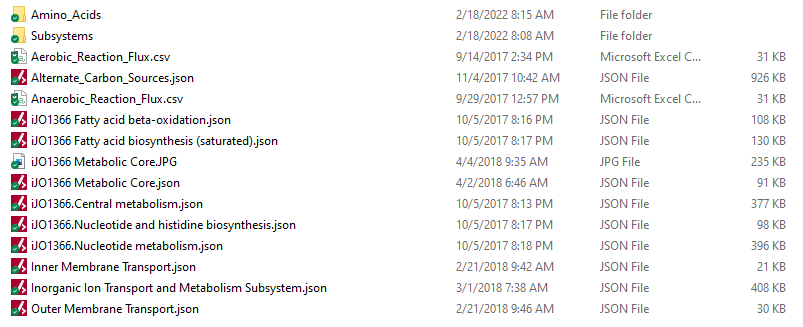

#### iJO1366 Amino_Acids Directory

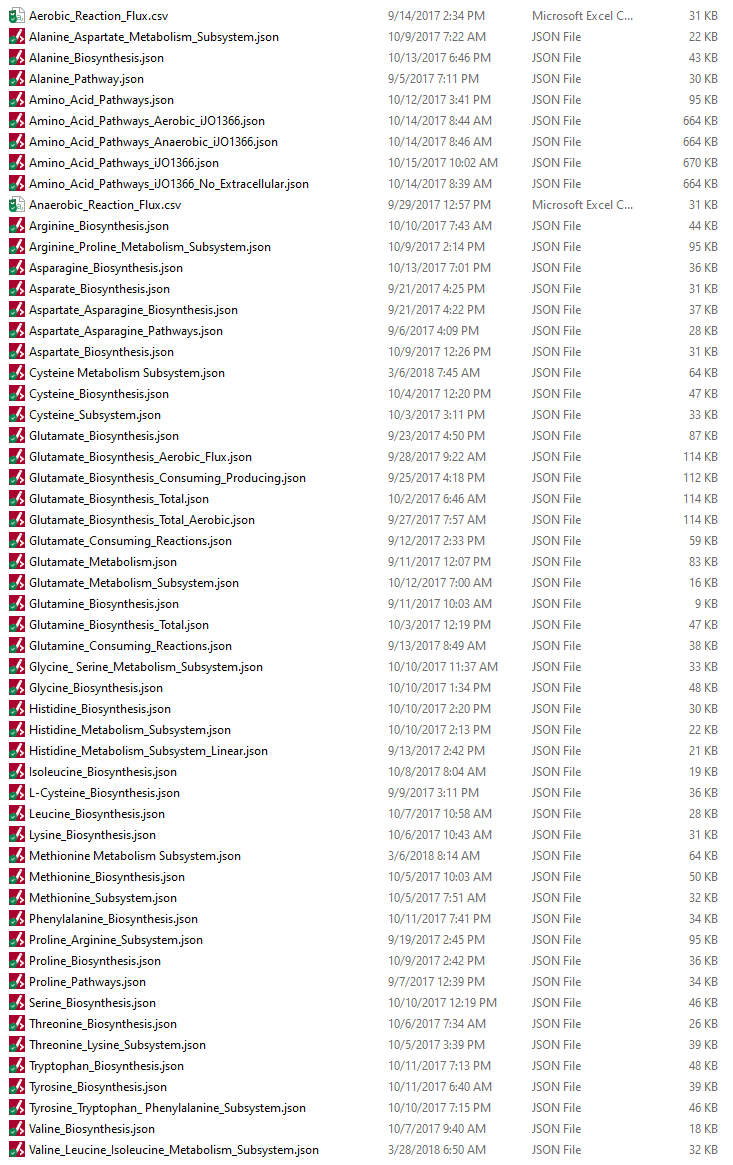

#### iJO1366 Subsystems Directory

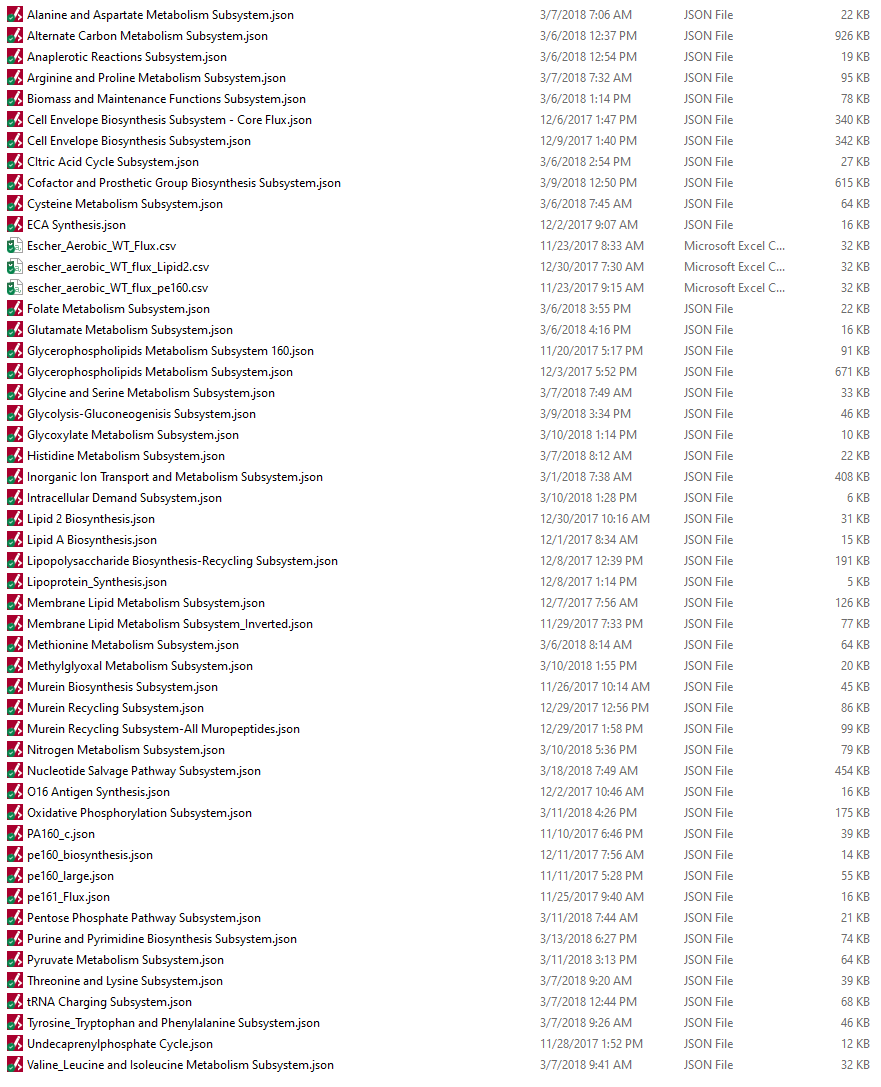